In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_csv("/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVC/fw/DS/mem_MSC01.csv", index_col=[0,1], skipinitialspace=True, header=[0,1])
#df2=pd.read_csv("/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVC/fw/DS/mem_MSC02.csv", index_col=[0,1], skipinitialspace=True, header=[0,1])
df=df.droplevel(level=1)
df=df.droplevel(level=1, axis=1)
df = df.where(np.triu(np.ones(df.shape),k=1).astype(np.bool))
df = df.stack().reset_index()
df.columns = ['Row','Column','Value']
df_new = df[df['Column']=='pon']

In [77]:
df_new

,Row,Column,Value
325,unassign,pon,-0.000136
326,unassign,pon,-0.000475
327,unassign,pon,-0.000340
328,unassign,pon,0.000174
329,unassign,pon,-0.000357
...,...,...,...
55273,pon,pon,-0.000569
55274,pon,pon,-0.000188
55275,pon,pon,-0.000564
55276,pon,pon,-0.000317


In [89]:
#df_new.groupby('Row').mean()


#df_by = df_new.groupby('Row').agg(['mean'])

#df_by.sort_values(by='Row')

7691    -0.001341
22887   -0.001056
55235   -0.000971
55241   -0.000921
656     -0.000920
           ...   
40566    0.001409
43491    0.001442
31620    0.001576
27306    0.001589
31619    0.001643
Length: 2303, dtype: float64

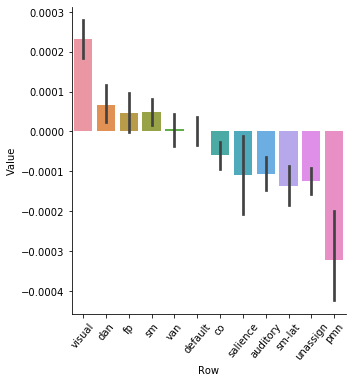

In [73]:
g=sns.factorplot(x='Row', y='Value', data=l, kind='bar',
              sharey=False,order=['visual', 'dan', 'fp', 'sm', 'van', 'default', 'co', 'salience', 'auditory', 'sm-lat','unassign', 'pmn'])
g.set_xticklabels(rotation=50)

In [16]:
from sklearn.svm import LinearSVC
import numpy as np
import reshape
import plotFW
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import metrics
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
clf = LinearSVC()
    #Load task FC
taskFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/mem/MSC01_parcel_corrmat.mat')
        #Load rest
restFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/rest/MSC01_parcel_corrmat.mat')
        #Create a training dataset targets 1/0 ==task/rest, chunk=#days
x_train=np.concatenate((taskFC, restFC))
taskSize=taskFC.shape[0]
restSize=restFC.shape[0]
t = np.ones(taskSize, dtype = int)
r=np.zeros(restSize, dtype=int)
y_train = np.concatenate((t,r))
clf.fit(x_train, y_train)
        #Cross validation
CVscores=cross_val_score(clf, x_train, y_train, cv=taskSize)
        #Obtain coefficients (feature weights)
coef = clf.coef_

In [18]:
coef.shape

(1, 55278)

In [19]:
taskFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/mem/MSC02_parcel_corrmat.mat')
        #Load rest
restFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/rest/MSC02_parcel_corrmat.mat')
        #Create a training dataset targets 1/0 ==task/rest, chunk=#days
x_train=np.concatenate((taskFC, restFC))
taskSize=taskFC.shape[0]
restSize=restFC.shape[0]
t = np.ones(taskSize, dtype = int)
r=np.zeros(restSize, dtype=int)
y_train = np.concatenate((t,r))
clf.fit(x_train, y_train)
        #Cross validation
CVscores=cross_val_score(clf, x_train, y_train, cv=taskSize)
        #Obtain coefficients (feature weights)
MSC02coef = clf.coef_

In [21]:
MSC02coef.shape

(1, 55278)

In [7]:
#np.cov(coef, MSC02coef)

f=list(df.columns)

In [8]:
df.nlargest(50, columns=['Value'])
df.nsmallest(50, columns=['Value'])

,Row,Column,Value
29417,visual,visual,-0.001634
29735,visual,co,-0.001614
21629,default,visual,-0.001576
33333,visual,visual,-0.001567
17365,default,visual,-0.001535
49173,co,co,-0.001525
29643,visual,visual,-0.001511
17366,default,visual,-0.001485
34175,visual,fp,-0.001482
25422,default,visual,-0.001471


In [12]:
df.nsmallest(1000, f)


unassign  unassign.1  unassign.2  unassign.3  unassign.4  \
unassign 5.0   -0.001053   -0.000889    0.000367   -0.000340    0.000722   
         28.0  -0.001010   -0.000304    0.000227   -0.000478    0.000216   
visual   100.0 -0.000911   -0.000900   -0.000353   -0.000331    0.000405   
default  51.0  -0.000775    0.000228   -0.000154   -0.000763   -0.000133   
dan      162.0 -0.000701   -0.000088   -0.000340   -0.000529    0.000078   
...                  ...         ...         ...         ...         ...   
unassign 14.0   0.000742   -0.000076    0.000169    0.000375    0.000163   
van      194.0  0.000743   -0.000293    0.000328    0.000243   -0.000362   
auditory 319.0  0.000806   -0.000232    0.000276    0.000364   -0.000231   
fp       140.0  0.000839    0.000173    0.000052    0.000574    0.000143   
van      195.0  0.001027   -0.000148    0.000343    0.000796    0.000152   

                unassign.5  unassign.6  unassign.7  unassign.8  unassign.9  \
unassign 5.0      0.000000   -0.000311   -0.000483    0.000785   -0.000169   
         28.0     0.000530   -0.000502    0.000272    0.001273    0.000734   
visual   100.0    0.000031   -0.000125   -0.000254    0.000736    0.000418   
default  51.0    -0.000553   -0.000388   -0.000219    0.000110    0.000143   
dan      162.0    0.000229   -0.000339   -0.000047    0.000070    0.000300   
...                    ...         ...         ...         ...         ...   
unassign 14.0    -0.000166    0.000002   -0.000124    0.000166   -0.000215   
van      194.0   -0.000065   -0.000294   -0.000045   -0.000486    0.000017   
auditory 319.0   -0.000187    0.000272    0.000137    0.000080   -0.000036   
fp       140.0    0.000205   -0.000049   -0.000237   -0.000132   -0.000320   
van      195.0   -0.000414   -0.000124    0.000409   -0.000359    0.000128   

                ...     pmn.2     pmn.3     pmn.4       pon         pon.1  \
unassign 5.0    ... -0.000589 -0.000189 -0.000185 -0.000129 -6.836762e-04   
         28.0   ...  0.000311 -0.000064 -0.000520 -0.000167 -4.888119e-04   
visual   100.0  ... -0.000007 -0.000296 -0.000644 -0.000621 -1.197273e-05   
default  51.0   ...  0.000484  0.000156  0.000046 -0.000072 -5.071343e-04   
dan      162.0  ...  0.000713 -0.000042 -0.000474 -0.000093 -2.806449e-04   
...             ...       ...       ...       ...       ...           ...   
unassign 14.0   ...  0.000151  0.000105  0.000562  0.000491 -5.395685e-05   
van      194.0  ...  0.000129 -0.000058 -0.000335 -0.000540 -4.084235e-04   
auditory 319.0  ... -0.000380  0.000531  0.000607  0.000295 -9.370406e-07   
fp       140.0  ...  0.000146  0.000450 -0.000106  0.000008  1.508558e-04   
van      195.0  ...  0.000037 -0.000218 -0.000018 -0.000195 -3.631073e-04   

                   pon.2     pon.3     pon.4     pon.5     pon.6  
unassign 5.0   -0.000089 -0.000219 -0.000306 -0.000220  0.000410  
         28.0  -0.000359 -0.000244 -0.000162 -0.000434 -0.000200  
visual   100.0  0.000021 -0.000416  0.000255  0.000298  0.000104  
default  51.0  -0.000751 -0.000049 -0.000205 -0.000163 -0.000545  
dan      162.0 -0.000347 -0.000099 -0.000026 -0.000287 -0.000220  
...                  ...       ...       ...       ...       ...  
unassign 14.0  -0.000123  0.000438  0.000015 -0.000468  0.000242  
van      194.0 -0.000558 -0.000455 -0.000311 -0.000279  0.000133  
auditory 319.0  0.000114  0.000650  0.000324 -0.000152  0.000274  
fp       140.0  0.000166  0.000083  0.000225 -0.000019  0.000243  
van      195.0 -0.000411 -0.000201 -0.000490 -0.000147  0.000123  

[334 rows x 333 columns]

In [14]:
GroupBy.max?

Object `GroupBy.max` not found.


In [16]:
pd.core.groupby.GroupBy.max(df)

AttributeError: 'DataFrame' object has no attribute '_set_group_selection'

In [20]:
df.groupby(['unassign'], sort=False).max#['count'].max()

ValueError: Grouper for 'unassign' not 1-dimensional

In [27]:
unassign=df['unassign']

In [16]:
import seaborn as sns
sns.heatmap()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [35]:
unassign

0         1         2         3         4         5  \
unassign 0    0.000000 -0.000608  0.000272 -0.000423  0.000203 -0.001053   
         1   -0.000608  0.000000 -0.000402 -0.000409  0.000373 -0.000889   
         2    0.000272 -0.000402  0.000000 -0.000046  0.000085  0.000367   
         3   -0.000423 -0.000409 -0.000046  0.000000  0.000019 -0.000340   
         4    0.000203  0.000373  0.000085  0.000019  0.000000  0.000722   
...                ...       ...       ...       ...       ...       ...   
pon      328 -0.000340 -0.000362 -0.000342 -0.000026  0.000418 -0.000089   
         329  0.000174 -0.000287 -0.000057  0.000217  0.000141 -0.000219   
         330 -0.000357  0.000008  0.000239 -0.000515  0.000435 -0.000306   
         331 -0.000061 -0.000007  0.000198 -0.000370  0.000284 -0.000220   
         332 -0.000350 -0.000382  0.000323 -0.000308  0.000452  0.000410   

                     6         7         8         9  ...        38        39  \
unassign 0   -0.000633 -0.000524  0.000693 -0.000135  ...  0.000042  0.000725   
         1   -0.000084  0.000199  0.000540  0.000480  ... -0.000056 -0.000185   
         2   -0.000194 -0.000208 -0.000005  0.000121  ... -0.000246 -0.000088   
         3   -0.000230 -0.000308  0.000508 -0.000059  ... -0.000101 -0.000019   
         4    0.000201  0.000007 -0.000233 -0.000100  ... -0.000126  0.000267   
...                ...       ...       ...       ...  ...       ...       ...   
pon      328  0.000101 -0.000127  0.000263 -0.000071  ...  0.000062 -0.000345   
         329  0.000284 -0.000255  0.000118 -0.000668  ... -0.000012 -0.000437   
         330  0.000044 -0.000408  0.000744 -0.000044  ... -0.000356  0.000090   
         331 -0.000396 -0.000351  0.000071 -0.000009  ... -0.000336  0.000372   
         332 -0.000006 -0.000344  0.000411 -0.000010  ... -0.000271  0.000206   

                    40        41        42        43        44        45  \
unassign 0   -0.000258  0.000299  0.000270 -0.000284  0.000099 -0.000265   
         1    0.000586 -0.000073  0.000261 -0.000085  0.000277 -0.000213   
         2    0.000471  0.000061 -0.000093 -0.000246  0.000085 -0.000205   
         3   -0.000485 -0.000480  0.000071 -0.000281 -0.000186 -0.000559   
         4   -0.000187  0.000087 -0.000250 -0.000081  0.000191  0.000390   
...                ...       ...       ...       ...       ...       ...   
pon      328  0.000036 -0.000127 -0.000261 -0.000311 -0.000151 -0.000837   
         329  0.000138 -0.000330 -0.000192 -0.000535 -0.000346 -0.000493   
         330 -0.000045 -0.000413 -0.000438 -0.000310 -0.000149 -0.000020   
         331 -0.000006 -0.000087  0.000390  0.000303  0.000281 -0.000445   
         332 -0.000285 -0.000316 -0.000261 -0.000183  0.000032 -0.000417   

                    46        47  
unassign 0   -0.000236 -0.000233  
         1   -0.000470 -0.000074  
         2   -0.000412 -0.000209  
         3   -0.000457 -0.000403  
         4    0.000238 -0.000239  
...                ...       ...  
pon      328 -0.000809 -0.000406  
         329 -0.000667  0.000233  
         330 -0.000720 -0.000214  
         331  0.000105  0.000107  
         332 -0.000674 -0.000171  

[333 rows x 48 columns]

In [38]:
ml=unassign.droplevel(level=1)

In [40]:
ml

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
unassign,0.000000,-0.000608,0.000272,-0.000423,0.000203,-0.001053,-0.000633,-0.000524,0.000693,-0.000135,...,0.000042,0.000725,-0.000258,0.000299,0.000270,-0.000284,0.000099,-0.000265,-0.000236,-0.000233
unassign,-0.000608,0.000000,-0.000402,-0.000409,0.000373,-0.000889,-0.000084,0.000199,0.000540,0.000480,...,-0.000056,-0.000185,0.000586,-0.000073,0.000261,-0.000085,0.000277,-0.000213,-0.000470,-0.000074
unassign,0.000272,-0.000402,0.000000,-0.000046,0.000085,0.000367,-0.000194,-0.000208,-0.000005,0.000121,...,-0.000246,-0.000088,0.000471,0.000061,-0.000093,-0.000246,0.000085,-0.000205,-0.000412,-0.000209
unassign,-0.000423,-0.000409,-0.000046,0.000000,0.000019,-0.000340,-0.000230,-0.000308,0.000508,-0.000059,...,-0.000101,-0.000019,-0.000485,-0.000480,0.000071,-0.000281,-0.000186,-0.000559,-0.000457,-0.000403
unassign,0.000203,0.000373,0.000085,0.000019,0.000000,0.000722,0.000201,0.000007,-0.000233,-0.000100,...,-0.000126,0.000267,-0.000187,0.000087,-0.000250,-0.000081,0.000191,0.000390,0.000238,-0.000239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pon,-0.000340,-0.000362,-0.000342,-0.000026,0.000418,-0.000089,0.000101,-0.000127,0.000263,-0.000071,...,0.000062,-0.000345,0.000036,-0.000127,-0.000261,-0.000311,-0.000151,-0.000837,-0.000809,-0.000406
pon,0.000174,-0.000287,-0.000057,0.000217,0.000141,-0.000219,0.000284,-0.000255,0.000118,-0.000668,...,-0.000012,-0.000437,0.000138,-0.000330,-0.000192,-0.000535,-0.000346,-0.000493,-0.000667,0.000233
pon,-0.000357,0.000008,0.000239,-0.000515,0.000435,-0.000306,0.000044,-0.000408,0.000744,-0.000044,...,-0.000356,0.000090,-0.000045,-0.000413,-0.000438,-0.000310,-0.000149,-0.000020,-0.000720,-0.000214
pon,-0.000061,-0.000007,0.000198,-0.000370,0.000284,-0.000220,-0.000396,-0.000351,0.000071,-0.000009,...,-0.000336,0.000372,-0.000006,-0.000087,0.000390,0.000303,0.000281,-0.000445,0.000105,0.000107


In [5]:
a = np.arange(16).reshape(4, 4)

print(np.triu(np.ones(a.shape), k=1).astype(np.bool))

[[False  True  True  True]
 [False False  True  True]
 [False False False  True]
 [False False False False]]


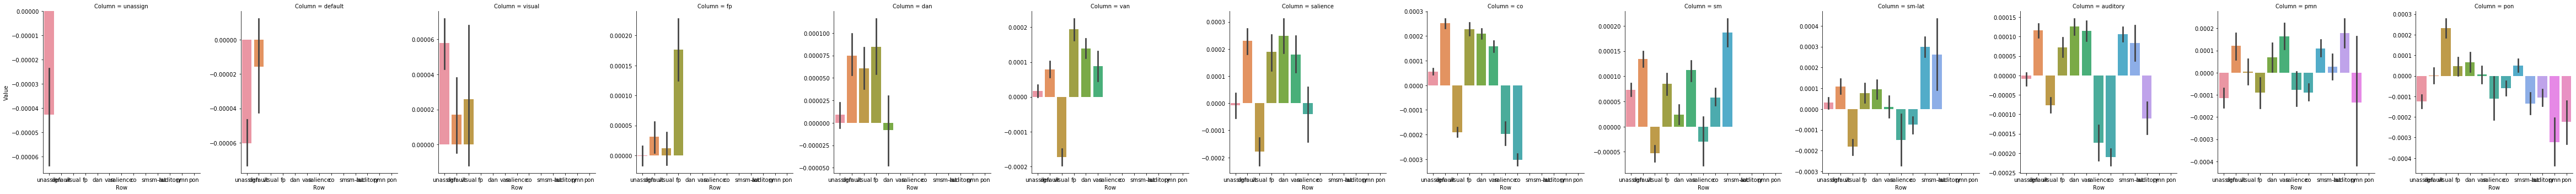

In [5]:
sns.factorplot(x='Row', y='Value', col='Column', data=df, kind='bar',
              sharey=False)
#g.set_xticklabels(rotation=50)